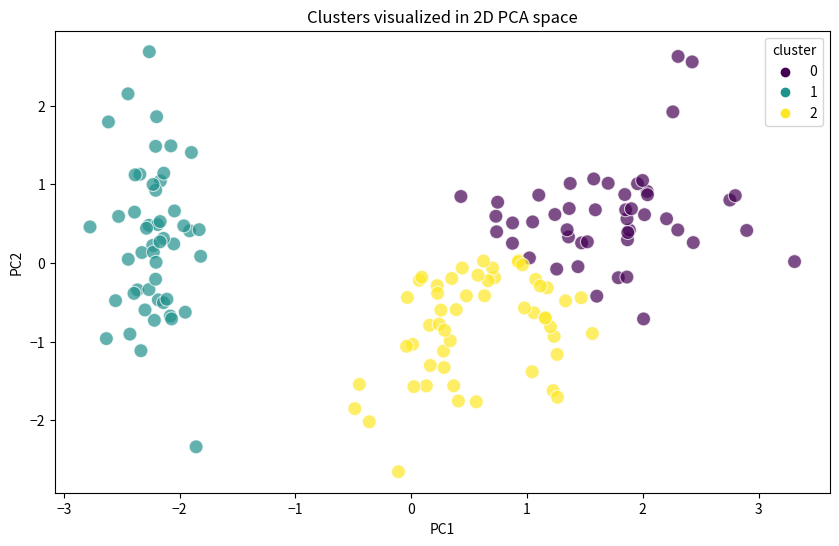

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the Iris dataset and convert it into a pandas DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df.iloc[:, :-1])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
iris_df['cluster'] = clusters

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualize the clusters in 2D PCA space
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters
pca_df['species'] = iris_df['species']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters visualized in 2D PCA space')
plt.show()

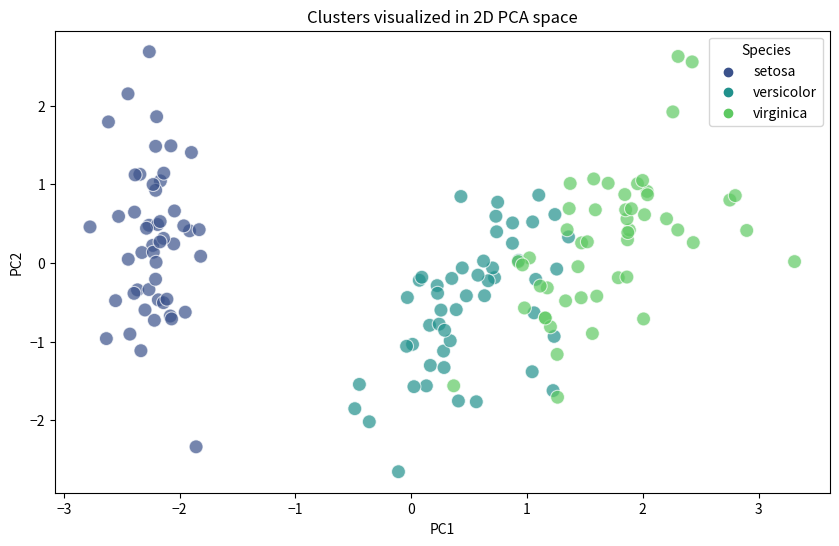

In [ ]:
# Update the visualization to include a legend for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters visualized in 2D PCA space')
plt.legend(title='Species')
plt.show()